## Objective:
* Predicting the process of visa approvals.


### Let us start by importing necessary libraries and data

In [7]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

from varname import nameof
# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Import Dataset

In [8]:
visa = pd.read_csv('EasyVisa.csv')

In [9]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

### View the first and last 5 rows of the dataset

In [10]:
data.head() 

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [11]:
data.tail()  

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset

In [12]:
data.shape

(25480, 12)

### Check the data types of the columns for the dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [14]:
# checking for duplicate values
data.duplicated().sum() 

0

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [15]:
data.describe(include='all')['no_of_employees']

count      25480.000000
unique              NaN
top                 NaN
freq                NaN
mean        5667.043210
std        22877.928848
min          -26.000000
25%         1022.000000
50%         2109.000000
75%         3504.000000
max       602069.000000
Name: no_of_employees, dtype: float64

**Fixing the negative values in number of employees columns**

In [16]:
mask=data.no_of_employees<0

In [17]:
data.loc[mask].shape ## Complete the code to check negative values in the employee column

(33, 12)

In [18]:
# taking the absolute values for number of employees
data["no_of_employees"] = np.abs(data["no_of_employees"]) 

**Let's check the count of each unique category in each of the categorical variables.** 

In [19]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [20]:
# checking the number of unique values
data["case_id"].nunique() 

25480

In [21]:
data.drop(["case_id"], axis=1, inplace=True)

### Univariate Analysis

In [22]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None,color='brown'):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
 
    f2, ( ax_hist2,ax_box2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.75, 0.25)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color=color
    )  # boxplot will be created and a star will indicate the mean value of the column
    ax_box2.set_xlabel('{}'.format(feature.replace('_',' ').title()))
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.savefig(feature+'_histbox.png',dpi=300)

### Observations on number of employees

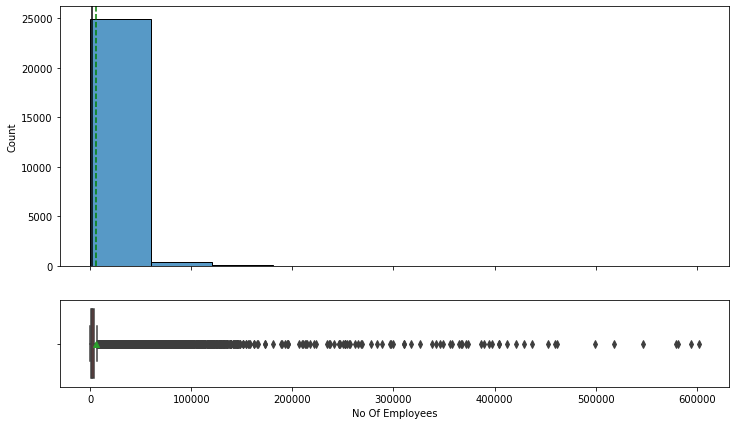

In [23]:
histogram_boxplot(data, "no_of_employees",bins=10)

### Observations on prevailing wage

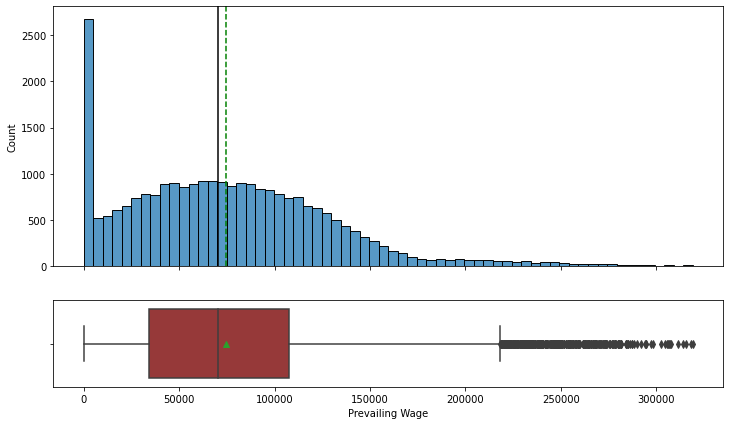

In [24]:
histogram_boxplot(data,"prevailing_wage") 

In [25]:

#data.prevailing_wage.sort_values(ascending=True)
#pd.cro(data.unit_of_wage,data.prevailing_wage)

In [26]:
# checking the observations which have less than 100 prevailing wage
data.loc[data.prevailing_wage<100] 

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [27]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts() ## Complete the code to get the count of the values in the mentioned column

Hour    176
Name: unit_of_wage, dtype: int64

In [28]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None,palette='Paired',figsize=(8,8)):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
        plt.tight_layout()
    else:
        plt.figure(figsize=(n + 1, 5))
        plt.tight_layout()

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette=palette,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.3f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=14,
            weight='bold',
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.xlabel('{}'.format(feature.replace('_',' ').title()))
    #plt.tight_layout()
    plt.savefig(feature+'_bars.png',dpi=200,bbox_inches='tight') # save
    plt.show()  # show the plot

### Observations on continent

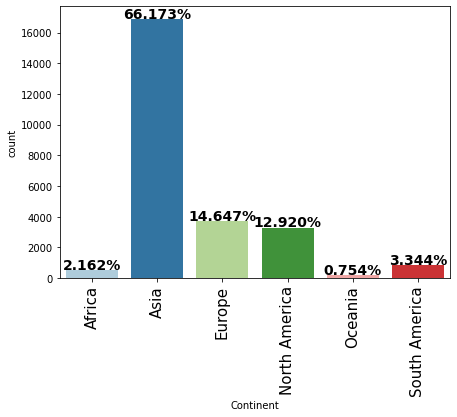

In [29]:
labeled_barplot(data, "continent", perc=True) 

### Observations on education of employee

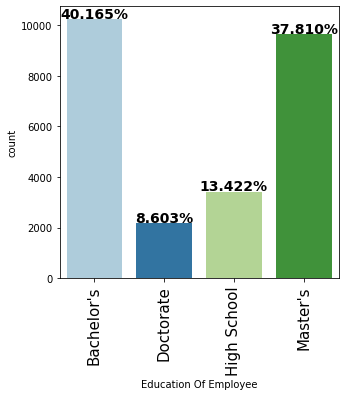

In [30]:
labeled_barplot(data,'education_of_employee') 

### Observations on job experience

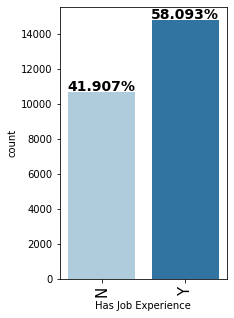

In [31]:
labeled_barplot(data,'has_job_experience')  

### Observations on job training

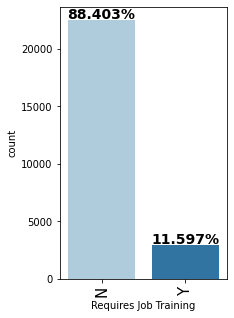

In [32]:
labeled_barplot(data,"requires_job_training")  

### Observations on region of employment

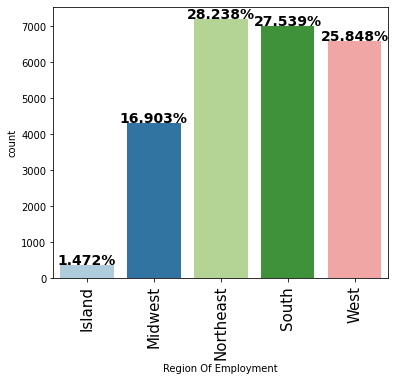

In [33]:
labeled_barplot(data,'region_of_employment') 

### Observations on unit of wage

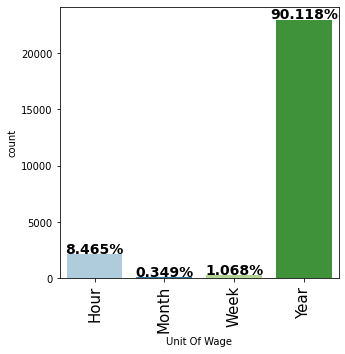

In [34]:
labeled_barplot(data,'unit_of_wage') 

### Observations on case status

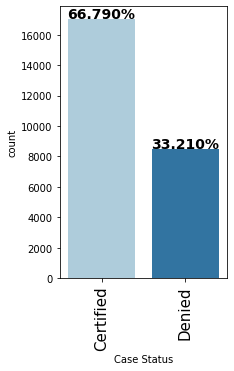

In [35]:
labeled_barplot(data,'case_status')  

### Bivariate Analysis

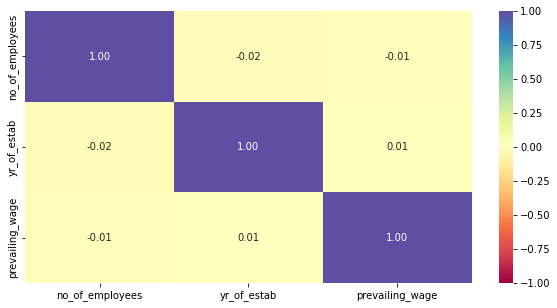

In [36]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

**Creating functions that will help us with further analysis.**

In [37]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    axs[0, 0].set_xlabel('{}'.format(predictor.replace('_',' ').title()))

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )
    axs[0, 1].set_xlabel('{}'.format(predictor.replace('_',' ').title()))

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].set_xlabel('{}'.format(target.replace('_',' ').title()))

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    axs[1, 1].set_xlabel('{}'.format(target.replace('_',' ').title()))
    plt.tight_layout()
    plt.savefig(predictor+target+'hist.png',dpi=200,bbox_inches='tight') # save
    plt.show()

In [38]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
   
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.xlabel('{}'.format(predictor.replace('_',' ').title()))
    plt.ylabel('{}'.format(target.replace('_',' ').title()))
    
    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.savefig(predictor+target+'_stakedbars.png',dpi=200,bbox_inches='tight') # save
    plt.show()

**Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


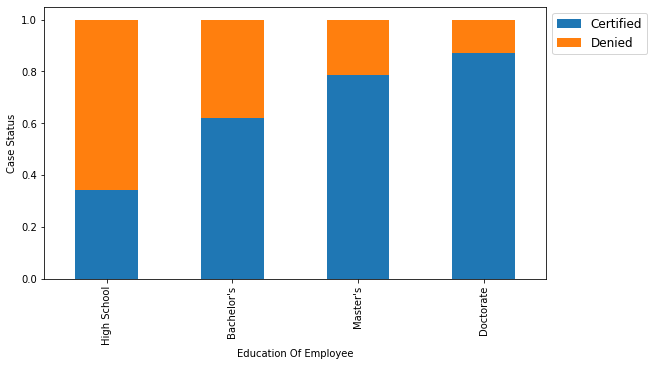

In [39]:
stacked_barplot(data, "education_of_employee", "case_status")

**Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further**

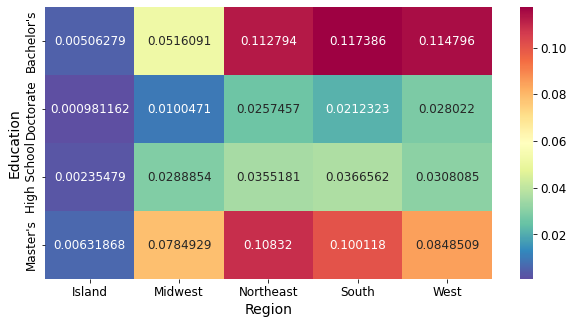

In [40]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'],data['region_of_employment'],normalize=True),
    annot=True,
    fmt="g",
    cmap="Spectral_r"
) ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

**Let's have a look at the percentage of visa certifications across each region**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


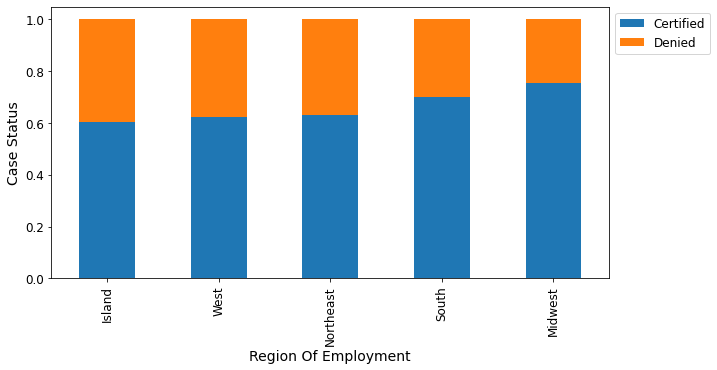

In [41]:
stacked_barplot(data,'region_of_employment' ,'case_status')

**Lets' similarly check for the continents and find out how the visa status vary across different continents.**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


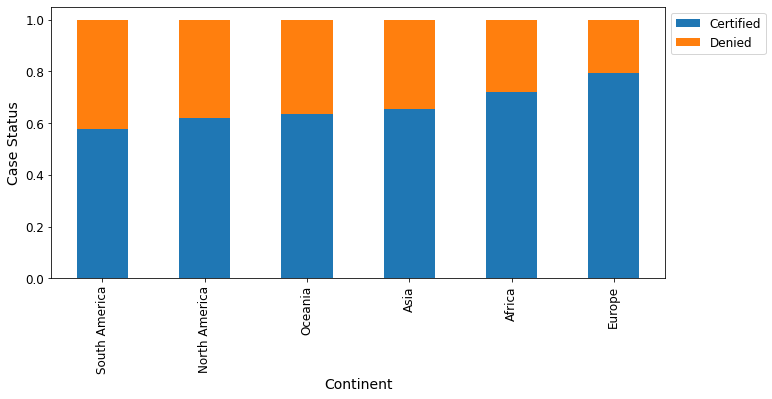

In [42]:
stacked_barplot(data,'continent','case_status') ## Complete the code to plot stacked barplot for continent and case status

**Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification** 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


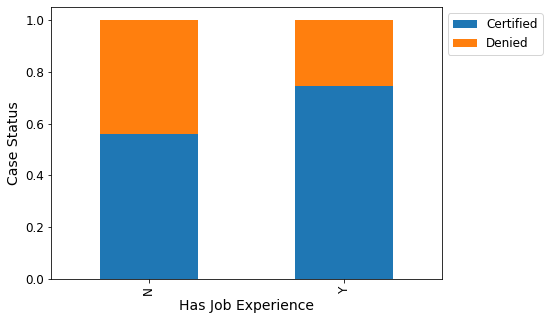

In [43]:
stacked_barplot(data,'has_job_experience' ,'case_status') 

**Do the employees who have prior work experience require any job training?**

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


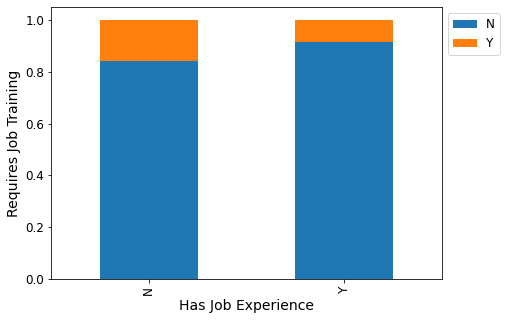

In [44]:
stacked_barplot(data,'has_job_experience','requires_job_training') ## Complete the code to plot stacked barplot for job experience and requires_job_training

**The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage**

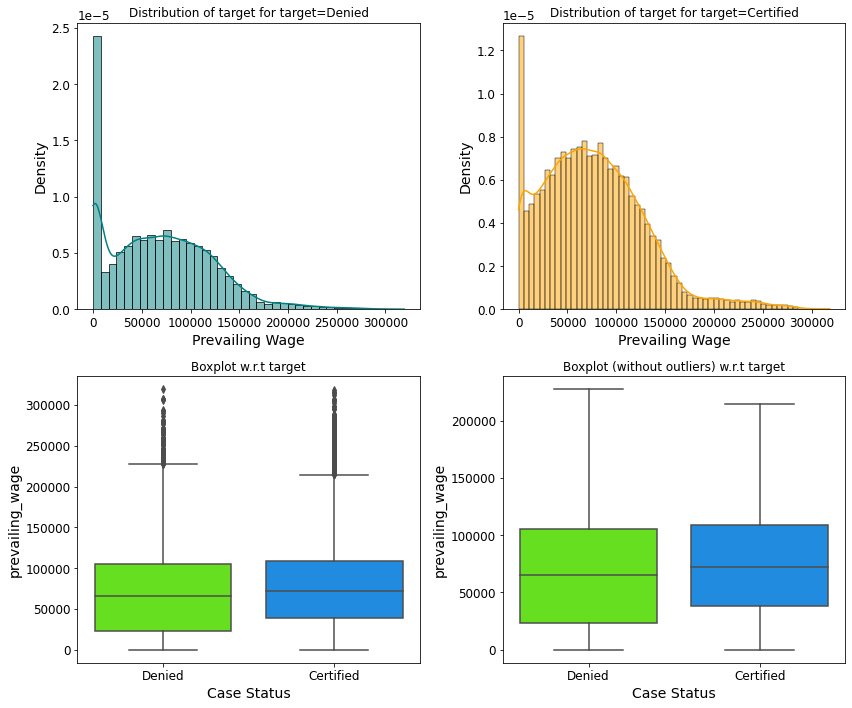

In [45]:
distribution_plot_wrt_target(data,'prevailing_wage','case_status')

**Checking if the prevailing wage is similar across all the regions of the US**

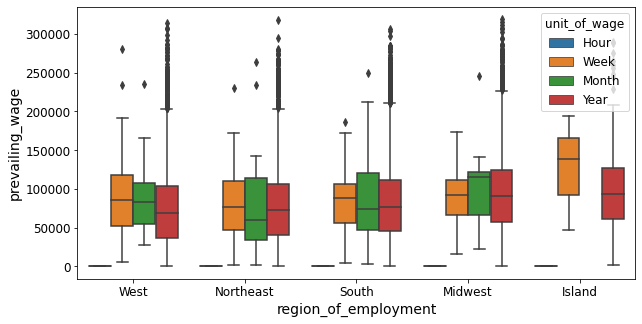

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data,x='region_of_employment',y='prevailing_wage',hue='unit_of_wage',hue_order=['Hour','Week','Month','Year']) 
plt.show()
plt.savefig('region_waves.png')

**The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


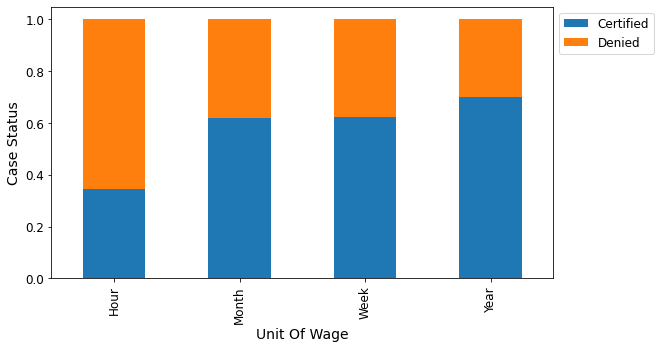

In [47]:
stacked_barplot(data,'unit_of_wage','case_status') ## Complete the code to plot stacked barplot for unit of wage and case status

### Outlier Check

- Let's check for outliers in the data.

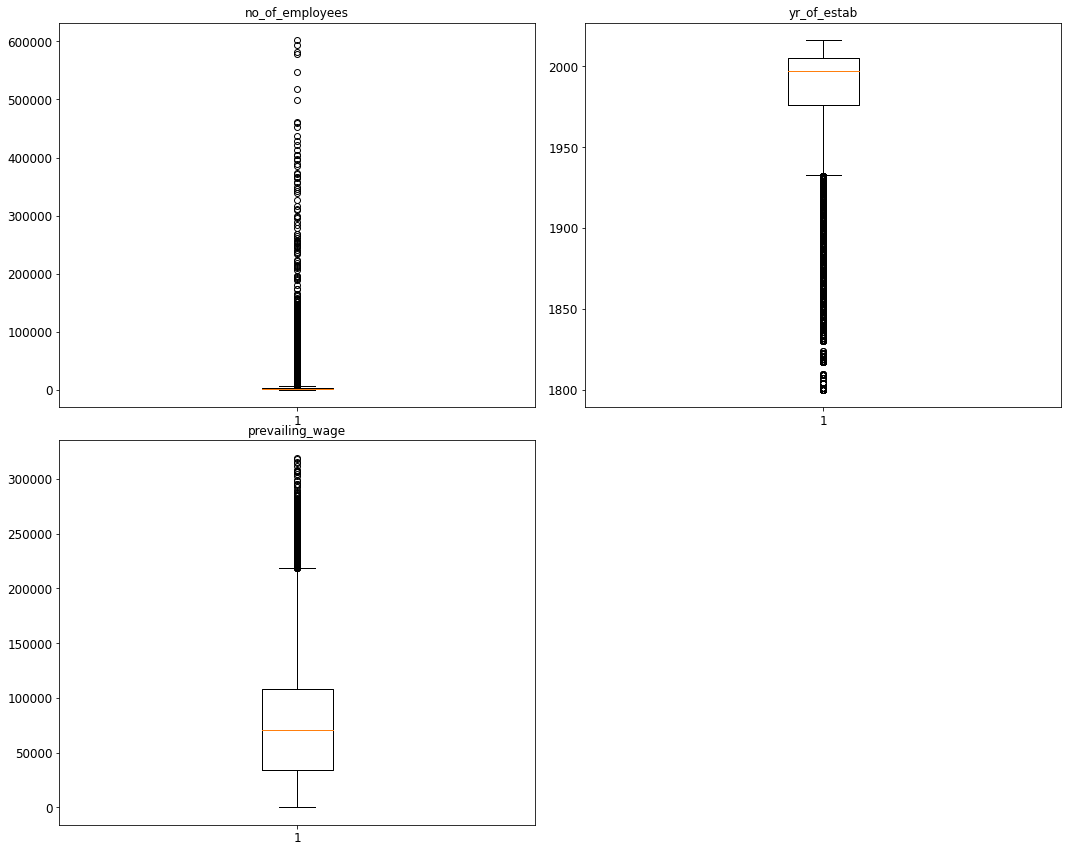

In [48]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
n=int(len(numeric_columns)/2)+1

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(n, n, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable) ## Complete the code to create boxplots for all the numeric columns
plt.show()

### Data Preparation for modeling



In [49]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop('case_status',axis=1) 
Y = data["case_status"]


X = pd.get_dummies(X,drop_first=True) 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1, test_size=0.3, stratify=Y) ## Complete the code to split the data into train and test in the ratio 70:30

In [50]:
X

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,2601,2008,77092.5700,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1
25476,3274,2006,279174.7900,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
25477,1121,1910,146298.8500,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
25478,1918,1887,86154.7700,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1


In [51]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


In [191]:
# check version number
import imblearn
#print(imblearn.__version__)

# transform the dataset
oversample = imblearn.over_sampling.SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [198]:
y.value_counts()

1    11913
0    11913
Name: case_status, dtype: int64




### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

In [52]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [53]:
def confusion_matrix_sklearn(model, predictors, target,Type='Training'):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{}".format(txt)+"\n{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for txt,item in zip(['TN', 'FP', 'FN', 'TP'], cm.flatten())
        ]
    ).reshape(2, 2)

    fig=plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="",cmap='Spectral_r')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(f"{Type} Data" )
    #names=str(model).split("(")[0]
    names=nameof(model)
    fig.savefig(f"confusion_{names}_{Type}.png",dpi=200)

# Logistic Regression 

In [177]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import RocCurveDisplay,roc_auc_score,plot_roc_curve,roc_curve,precision_recall_curve,plot_precision_recall_curve

In [192]:
model=LogisticRegressionCV(random_state=1,class_weight='balanced',penalty='l1',solver='liblinear',Cs=[0.01,0.05,0.02])
model.fit(X,y)


LogisticRegressionCV(Cs=[0.01, 0.05, 0.02], class_weight='balanced',
                     penalty='l1', random_state=1, solver='liblinear')

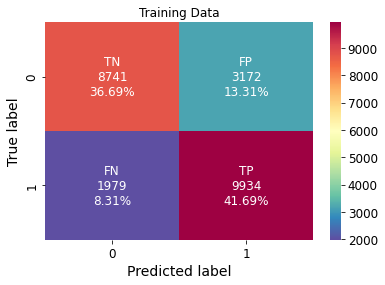

In [193]:

confusion_matrix_sklearn(model,X,y,'Training')


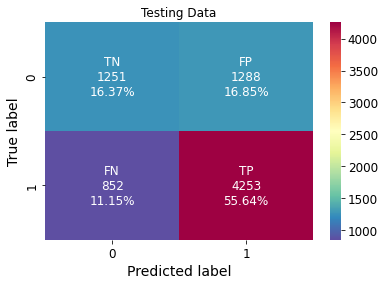

In [194]:
confusion_matrix_sklearn(model,X_test,y_test,'Testing')

In [195]:

lr_perf_train = model_performance_classification_sklearn(model,X_train,y_train) 
lr_perf_test = model_performance_classification_sklearn(model,X_test,y_test) 


In [196]:
print(lr_perf_train)
print(lr_perf_test)

   Accuracy    Recall  Precision        F1
0   0.72449  0.833879   0.771933  0.801711
   Accuracy    Recall  Precision        F1
0  0.720042  0.833105   0.767551  0.798986


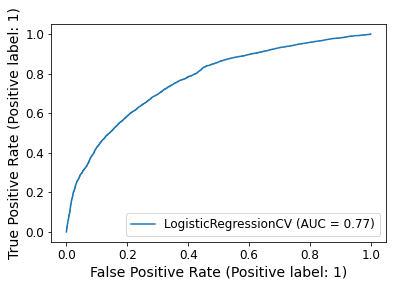

In [156]:

plot_roc_curve(model, X_train, y_train) 

In [180]:
def Find_Optimal_Cutoff(target, predicted):
    

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

threshold = Find_Optimal_Cutoff(y_test,model.predict_proba(X_test)[:,1])
print(threshold)
# Find prediction to the dataframe applying threshold
#y_predict_threshold = model.predict_proba(X_test)[:,1].map(lambda x: 1 if x > threshold else 0)


[0.5264819676864033]


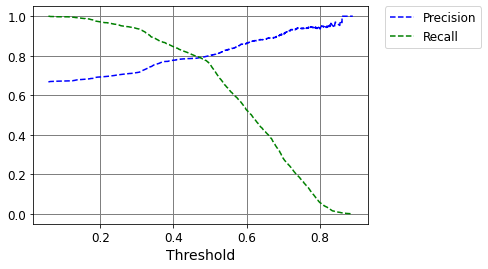

In [179]:
precisions, recalls, thresholds = precision_recall_curve(y_test,model.predict_proba(X_test)[:,1])

def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

<AxesSubplot:>

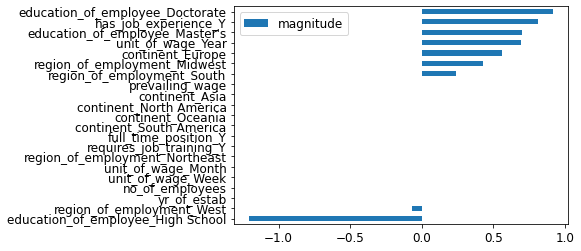

In [126]:
features_lr=pd.DataFrame(model.coef_,columns=model.feature_names_in_).T
features_lr.columns={'magnitude'}
features_lr.sort_values(by='magnitude').plot.barh()

### Decision Tree Model

In [47]:
model = DecisionTreeClassifier(random_state=1) ## Complete the code to define decision tree classifier with random state = 1
model.fit(X_train,y_train) ## Complete the code to fit decision tree classifier on the train data 

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

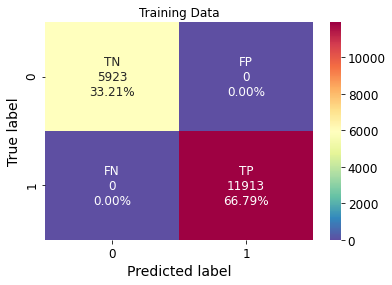

<IPython.core.display.Javascript object>

In [226]:
confusion_matrix_sklearn(model,X_train,y_train,'Training') ## Complete the code to create confusion matrix for train data

In [49]:
decision_tree_perf_train = model_performance_classification_sklearn(model,X_train,y_train) ## Complete the code to check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on test set

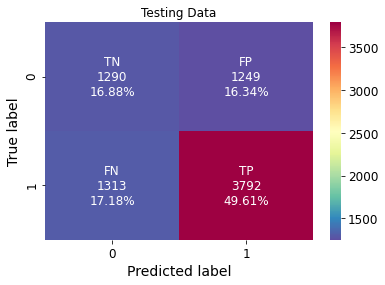

<IPython.core.display.Javascript object>

In [227]:
confusion_matrix_sklearn(model,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data

In [51]:
decision_tree_perf_test = model_performance_classification_sklearn(model,X_test,y_test) ## Complete the code to check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Decision Tree

In [52]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator,param_grid=parameters,n_jobs = -1) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

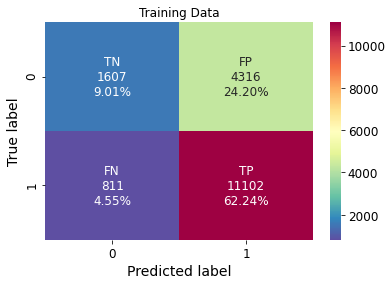

<IPython.core.display.Javascript object>

In [228]:
confusion_matrix_sklearn(dtree_estimator,X_train,y_train,'Training')## Complete the code to create confusion matrix for train data on tuned estimator

In [229]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


<IPython.core.display.Javascript object>

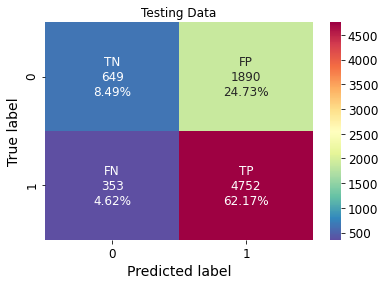

<IPython.core.display.Javascript object>

In [230]:
confusion_matrix_sklearn(dtree_estimator,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data on tuned estimator

In [231]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


<IPython.core.display.Javascript object>

### Bagging Classifier

In [57]:
bagging_classifier = BaggingClassifier(random_state=1) ## Complete the code to define bagging classifier with random state = 1
bagging_classifier.fit(X_train,y_train) ## Complete the code to fit bagging classifier on the train data

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

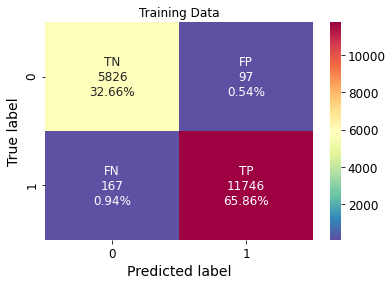

<IPython.core.display.Javascript object>

In [236]:
confusion_matrix_sklearn(bagging_classifier,X_train,y_train,'Training') ## Complete the code to create confusion matrix for train data

In [237]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_train,y_train) ## Complete the code to check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


<IPython.core.display.Javascript object>

#### Checking model performance on test set

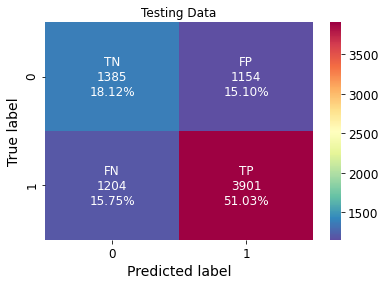

<IPython.core.display.Javascript object>

In [238]:
confusion_matrix_sklearn(bagging_classifier,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data

In [61]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier,X_test,y_test) ## Complete the code to check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Bagging Classifier

In [62]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned,param_grid=parameters,cv=5,n_jobs=-1) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.7, n_estimators=110,
                  random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

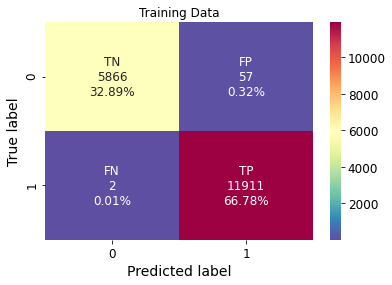

<IPython.core.display.Javascript object>

In [239]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train,'Training') ## Complete the code to create confusion matrix for train data on tuned estimator

In [64]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996692,0.999832,0.995237,0.997529


<IPython.core.display.Javascript object>

#### Checking model performance on test set

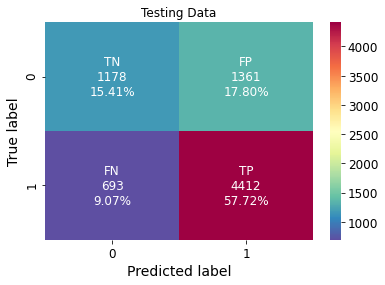

<IPython.core.display.Javascript object>

In [240]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data on tuned estimator

In [66]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.731293,0.864251,0.764247,0.811179


<IPython.core.display.Javascript object>

### Random Forest

In [67]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1,class_weight = 'balanced') ## Complete the code to define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train,y_train) ## Complete the code to fit random forest on the train data

RandomForestClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

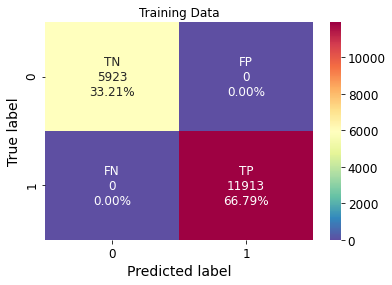

<IPython.core.display.Javascript object>

In [241]:
confusion_matrix_sklearn(rf_estimator,X_train,y_train,'Training') ## Complete the code to create confusion matrix for train data

In [69]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train,y_train) ## Complete the code to check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on test set

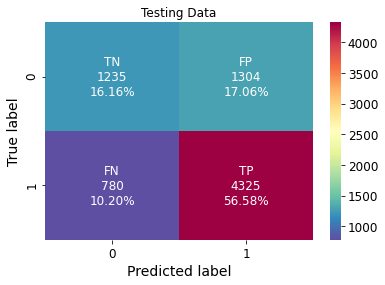

<IPython.core.display.Javascript object>

In [242]:
confusion_matrix_sklearn(rf_estimator,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data

In [71]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test) ## Complete the code to check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Random Forest

In [199]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned,param_grid=parameters,cv=5,n_jobs=-1) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X,y) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X, y)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=25,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

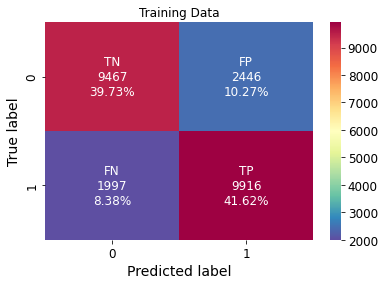

In [201]:
confusion_matrix_sklearn(rf_tuned,X,y,'Training') ## Complete the code to create confusion matrix for train data on tuned estimator

In [202]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X,y)## Complete the code to check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.813523,0.832368,0.802136,0.816972


#### Checking model performance on test set

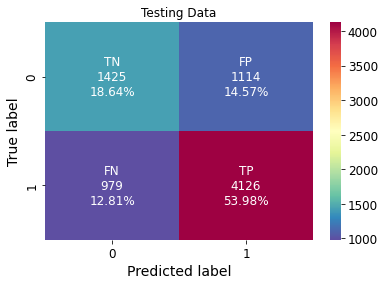

In [203]:
confusion_matrix_sklearn(rf_tuned,X_test,y_test,'Testing')## Complete the code to create confusion matrix for test data on tuned estimator

In [204]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.72619,0.808227,0.787405,0.79768


### AdaBoost Classifier

In [77]:
ab_classifier = AdaBoostClassifier(random_state=1) ## Complete the code to define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train,y_train) ## Complete the code to fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

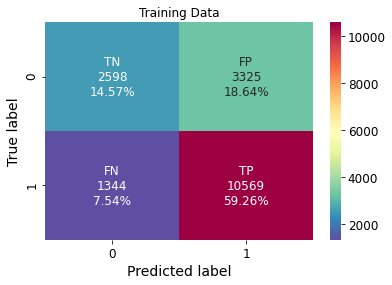

<IPython.core.display.Javascript object>

In [334]:
confusion_matrix_sklearn(ab_classifier,X_train,y_train,'Training') ## Complete the code to create confusion matrix for train data

In [79]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


<IPython.core.display.Javascript object>

#### Checking model performance on test set

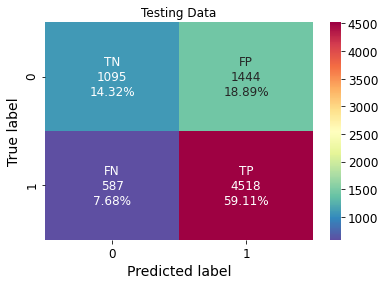

<IPython.core.display.Javascript object>

In [335]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data

In [81]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test) ## Complete the code to check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - AdaBoost Classifier

In [82]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned,param_grid=parameters,cv=5,n_jobs=-1) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

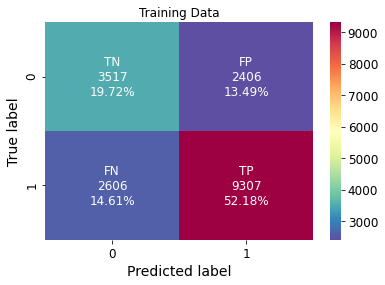

<IPython.core.display.Javascript object>

In [336]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train,'Training') ## Complete the code to create confusion matrix for train data on tuned estimator

In [84]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


<IPython.core.display.Javascript object>

#### Checking model performance on test set

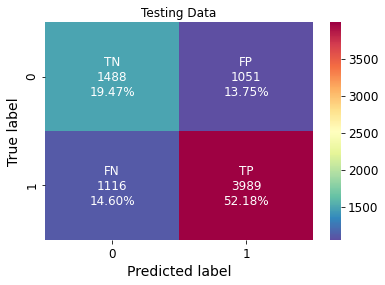

<IPython.core.display.Javascript object>

In [337]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data on tuned estimator

In [86]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


<IPython.core.display.Javascript object>

### Gradient Boosting Classifier

In [87]:
gb_classifier = GradientBoostingClassifier(random_state=1) ## Complete the code to define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(X_train,y_train) ## Complete the code to fit Gradient Boosting Classifier on the train data

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

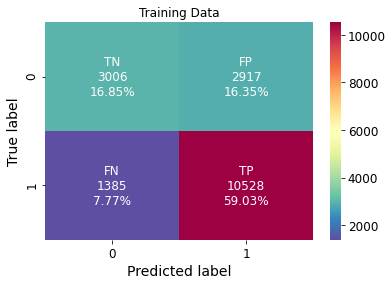

<IPython.core.display.Javascript object>

In [338]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train,'Training') ## Complete the code to create confusion matrix for train data

In [89]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train) ## Complete the code to check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


<IPython.core.display.Javascript object>

#### Checking model performance on test set

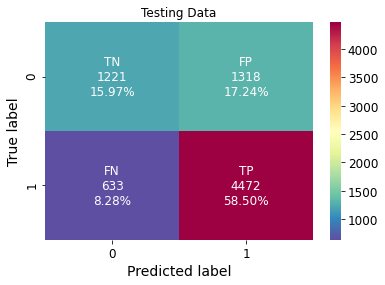

<IPython.core.display.Javascript object>

In [339]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data

In [91]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test) ## Complete the code to check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Gradient Boosting Classifier

In [92]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned,param_grid=parameters,cv=5,n_jobs=-1) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=0.9)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

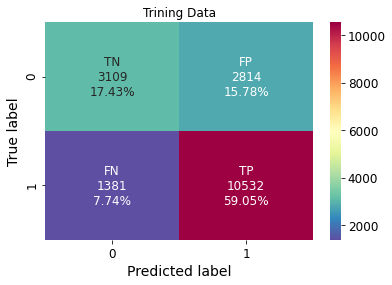

<IPython.core.display.Javascript object>

In [340]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train,'Trining') ## Complete the code to create confusion matrix for train data on tuned estimator

In [94]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764802,0.884076,0.78915,0.833921


<IPython.core.display.Javascript object>

#### Checking model performance on test set

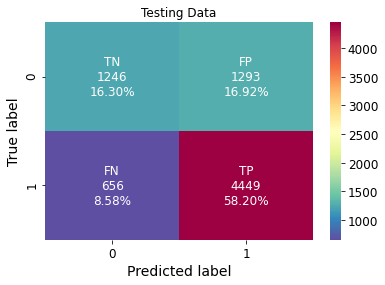

<IPython.core.display.Javascript object>

In [341]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data on tuned estimator

In [96]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745029,0.871499,0.774817,0.820319


<IPython.core.display.Javascript object>

### Note - You can choose not to build XGBoost if you have any installation issue

### XGBoost Classifier

In [97]:
xgb_classifier = XGBClassifier(random_state=1,eval_metric="logloss") ## Complete the code to define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier.fit(X_train,y_train) ## Complete the code to fit XGBoost Classifier on the train data

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

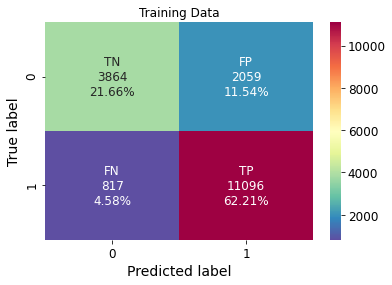

<IPython.core.display.Javascript object>

In [342]:
confusion_matrix_sklearn(xgb_classifier,X_train,y_train,'Training') ## Complete the code to create confusion matrix for train data

In [343]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train) ## Complete the code to check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


<IPython.core.display.Javascript object>

#### Checking model performance on test set

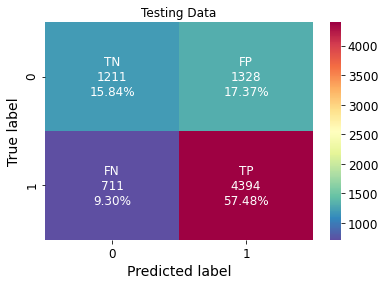

<IPython.core.display.Javascript object>

In [344]:
confusion_matrix_sklearn(xgb_classifier,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data

In [345]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test) ## Complete the code to check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - XGBoost Classifier

In [102]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned,param_grid=parameters,cv=5,n_jobs=-1) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

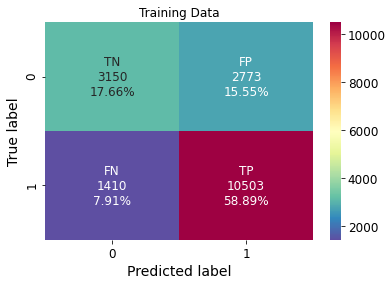

<IPython.core.display.Javascript object>

In [346]:
confusion_matrix_sklearn(xgb_tuned,X_train,y_train,'Training') ## Complete the code to create confusion matrix for train data on tuned estimator

In [347]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765474,0.881642,0.791127,0.833935


<IPython.core.display.Javascript object>

#### Checking model performance on test set

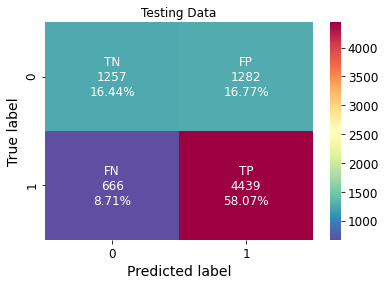

<IPython.core.display.Javascript object>

In [348]:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data on tuned estimator

In [349]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74516,0.86954,0.775913,0.820063


<IPython.core.display.Javascript object>

### Stacking Classifier

In [107]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators) ## Complete the code to define Stacking Classifier

stacking_classifier.fit(X_train,y_train) ## Complete the code to fit Stacking Classifier on the train data

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                

<IPython.core.display.Javascript object>

#### Checking model performance on training set

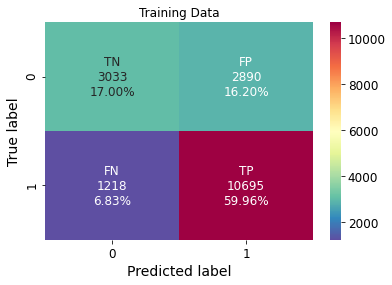

<IPython.core.display.Javascript object>

In [351]:
confusion_matrix_sklearn(stacking_classifier,X_train,y_train,'Training') ## Complete the code to create confusion matrix for train data

In [109]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train) ## Complete the code to check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769679,0.897759,0.787265,0.838889


<IPython.core.display.Javascript object>

#### Checking model performance on test set

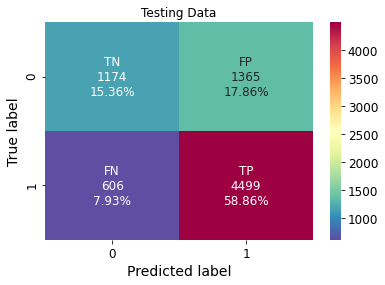

<IPython.core.display.Javascript object>

In [352]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test,'Testing') ## Complete the code to create confusion matrix for test data

In [353]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test) ## Complete the code to check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742151,0.881293,0.767224,0.820312


<IPython.core.display.Javascript object>

### Conclusion

**Comparing all models**

In [355]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree,1.000000,1.000000,1.000000,1.000000
Tuned Decision Tree,0.712548,0.931923,0.720067,0.812411
Bagging Classifier,0.985198,0.985982,0.991810,0.988887
Tuned Bagging Classifier,0.996692,0.999832,0.995237,0.997529
Random Forest,1.000000,1.000000,1.000000,1.000000
Tuned Random Forest,0.769119,0.918660,0.776556,0.841652
Adaboost Classifier,0.738226,0.887182,0.760688,0.819080
Tuned Adaboost Classifier,0.718995,0.781247,0.794587,0.787861
Gradient Boost Classifier,0.758802,0.883740,0.783042,0.830349
Tuned Gradient Boost Classifier,0.764802,0.884076,0.789150,0.833921


<IPython.core.display.Javascript object>

In [354]:
# testing performance comparison

 
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
      "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
models_test_comp_df.columns

print("Training performance comparison:")
models_test_comp_df.T
 

Training performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree,0.664835,0.742801,0.752232,0.747487
Tuned Decision Tree,0.706567,0.930852,0.715447,0.809058
Bagging Classifier,0.691523,0.764153,0.771711,0.767913
Tuned Bagging Classifier,0.731293,0.864251,0.764247,0.811179
Random Forest,0.727368,0.847209,0.768343,0.805851
Tuned Random Forest,0.738095,0.898923,0.755391,0.820930
Adaboost Classifier,0.734301,0.885015,0.757799,0.816481
Tuned Adaboost Classifier,0.716510,0.781391,0.791468,0.786397
Gradient Boost Classifier,0.744767,0.876004,0.772366,0.820927
Tuned Gradient Boost Classifier,0.745029,0.871499,0.774817,0.820319


<IPython.core.display.Javascript object>

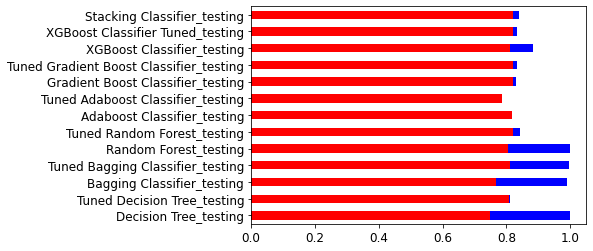

<IPython.core.display.Javascript object>

In [163]:
models_train_comp_df.loc['F1'].plot.barh(color='blue',label='training') 
models_test_comp_df.loc['F1'].plot.barh(color='red',label='testing')


In [193]:
diff_values=models_train_comp_df.values-models_test_comp_df.values
models=pd.DataFrame(diff_values,columns=models_train_comp_df.columns,index=models_train_comp_df.index).loc['F1'].sort_values(ascending=True)[:4].index

<IPython.core.display.Javascript object>

In [114]:
models_train_comp_df.columns=models_train_comp_df.columns+'_training'
models_test_comp_df.columns=models_test_comp_df.columns+'_testing'

<IPython.core.display.Javascript object>

In [285]:
models_all

,Decision Tree_training,Tuned Decision Tree_training,Bagging Classifier_training,Tuned Bagging Classifier_training,Random Forest_training,Tuned Random Forest_training,Adaboost Classifier_training,Tuned Adaboost Classifier_training,Gradient Boost Classifier_training,Tuned Gradient Boost Classifier_training,XGBoost Classifier_training,XGBoost Classifier Tuned_training,Stacking Classifier_training,Decision Tree_testing,Tuned Decision Tree_testing,Bagging Classifier_testing,Tuned Bagging Classifier_testing,Random Forest_testing,Tuned Random Forest_testing,Adaboost Classifier_testing,Tuned Adaboost Classifier_testing,Gradient Boost Classifier_testing,Tuned Gradient Boost Classifier_testing,XGBoost Classifier_testing,XGBoost Classifier Tuned_testing,Stacking Classifier_testing
Accuracy,1.0,0.712548,0.985198,0.996692,1.0,0.769119,0.738226,0.718995,0.758802,0.764802,0.838753,0.765474,0.769679,0.664835,0.706567,0.691523,0.731293,0.727368,0.738095,0.734301,0.716510,0.744767,0.745029,0.733255,0.745160,0.742151
Recall,1.0,0.931923,0.985982,0.999832,1.0,0.918660,0.887182,0.781247,0.883740,0.884076,0.931419,0.881642,0.897759,0.742801,0.930852,0.764153,0.864251,0.847209,0.898923,0.885015,0.781391,0.876004,0.871499,0.860725,0.869540,0.881293
Precision,1.0,0.720067,0.991810,0.995237,1.0,0.776556,0.760688,0.794587,0.783042,0.789150,0.843482,0.791127,0.787265,0.752232,0.715447,0.771711,0.764247,0.768343,0.755391,0.757799,0.791468,0.772366,0.774817,0.767913,0.775913,0.767224
F1,1.0,0.812411,0.988887,0.997529,1.0,0.841652,0.819080,0.787861,0.830349,0.833921,0.885272,0.833935,0.838889,0.747487,0.809058,0.767913,0.811179,0.805851,0.820930,0.816481,0.786397,0.820927,0.820319,0.811675,0.820063,0.820312


<IPython.core.display.Javascript object>

In [1]:
from xgboost import plot_importance
plot_importance(xgb_tuned)


NameError: name 'xgb_tuned' is not defined

### Important features of the final model

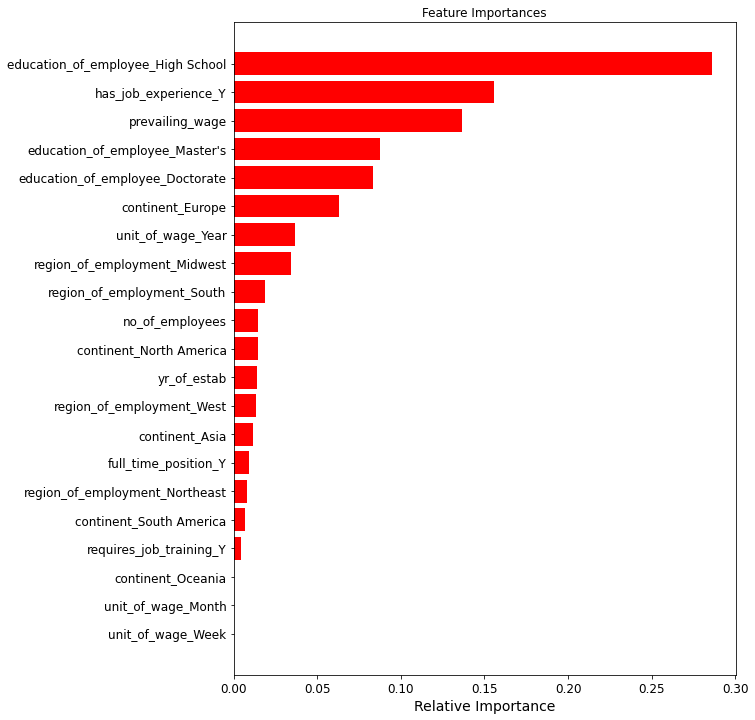

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [364]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

fig=plt.figure(figsize=(9, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
plt.tight_layout()
fig.savefig('features.png',bbox_inches='tight')

## Insight and Recommendations
* 66% of the visa applicants are Asian, and 14% European 
* 40% has Bachelor degree and 37% has Master degree,8% Doctrorate, 135 high school
*  58% has a job experiences
*  88% of applicant does't need job training
*  Northeast,south,and west of region of employment has the highest percentage
*  66% of visa was  approved. 
*  there is no correlation between features. 
* The higher education the applicants, the most likely to have granted the visa 
* applicant with Bachelor's mostly will be accepted in south and west. applicant with Doctorate will be accepted in west and northeast, High school most likely will be accepted in south, Master's will be accepted in Northeast and south. 
* The percentage of visa certified is higher is midwest and south. 
* The percentage of visa certified is higher in Africa and Europe. 
* the visa certification is higher for applicant with jobs experience. 
* the employees who have prior work experience require less job training.
* the higher the prevailing wage the most visa certified.  
* island and Midwest has the higher prevailing wages 
* yearly prevailing waves most likely to get their visa cerifies 
* There is no outliers to remove. All the values looks valid. 
* the classes percentage is {1:0.66,0:0.33}
* We choose F1_score as a metric for evaluation the model.  

# Recommendation
* the most important features are the following in order: 
 'education_of_employee_High School',
 'has_job_experience_Y',
 'prevailing_wage',
 "education_of_employee_Master's",
 'education_of_employee_Doctorate',
 'continent_Europe',
 'unit_of_wage_Year',
 'region_of_employment_Midwest',
 'region_of_employment_South',
 'no_of_employees',
 'continent_North America',
 'yr_of_estab',
 'region_of_employment_West',
 'continent_Asia',
  'full_time_position_Y',
 'region_of_employment_Northeast',
 'continent_South America',
 'requires_job_training_Y',

 *  We can use this predictive model to predict the certified visa. The ability to predict the number of certified visa per year can allow to oversee the Visa system to manage them more efficiently.
 to facilitate the process of visa approvals, a model of the important features was build to generate prediction and make a list by the approved visa cases.  
 applicant with high job experience, and from Europe, and high prevailing wages. 
  